In [1]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# True parameters
a_true = 3.5
b_true = -2.0
c_true = 5.0

# Number of samples
n_samples = 100

# Generate uncorrelated x1 and x2
x1 = np.random.normal(0, 1, n_samples)
x2 = np.random.normal(0, 1, n_samples)

# Check correlation (optional)
print(f"Correlation between x1 and x2: {np.corrcoef(x1, x2)[0,1]:.4f}")

# Generate y with small Gaussian noise
noise = np.random.normal(0, 0.1, n_samples)
y = a_true * x1 + b_true * x2 + c_true + noise

# Stack features with bias term (column of ones)
X = np.column_stack((x1, x2, np.ones(n_samples)))

# Closed-form solution: θ = (XᵀX)⁻¹Xᵀy
theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Extract estimated parameters
a_hat, b_hat, c_hat = theta_hat

print(f"\nEstimated parameters:")
print(f"a ≈ {a_hat:.4f} (True: {a_true})")
print(f"b ≈ {b_hat:.4f} (True: {b_true})")
print(f"c ≈ {c_hat:.4f} (True: {c_true})")

Correlation between x1 and x2: -0.1364

Estimated parameters:
a ≈ 3.5226 (True: 3.5)
b ≈ -2.0012 (True: -2.0)
c ≈ 5.0089 (True: 5.0)


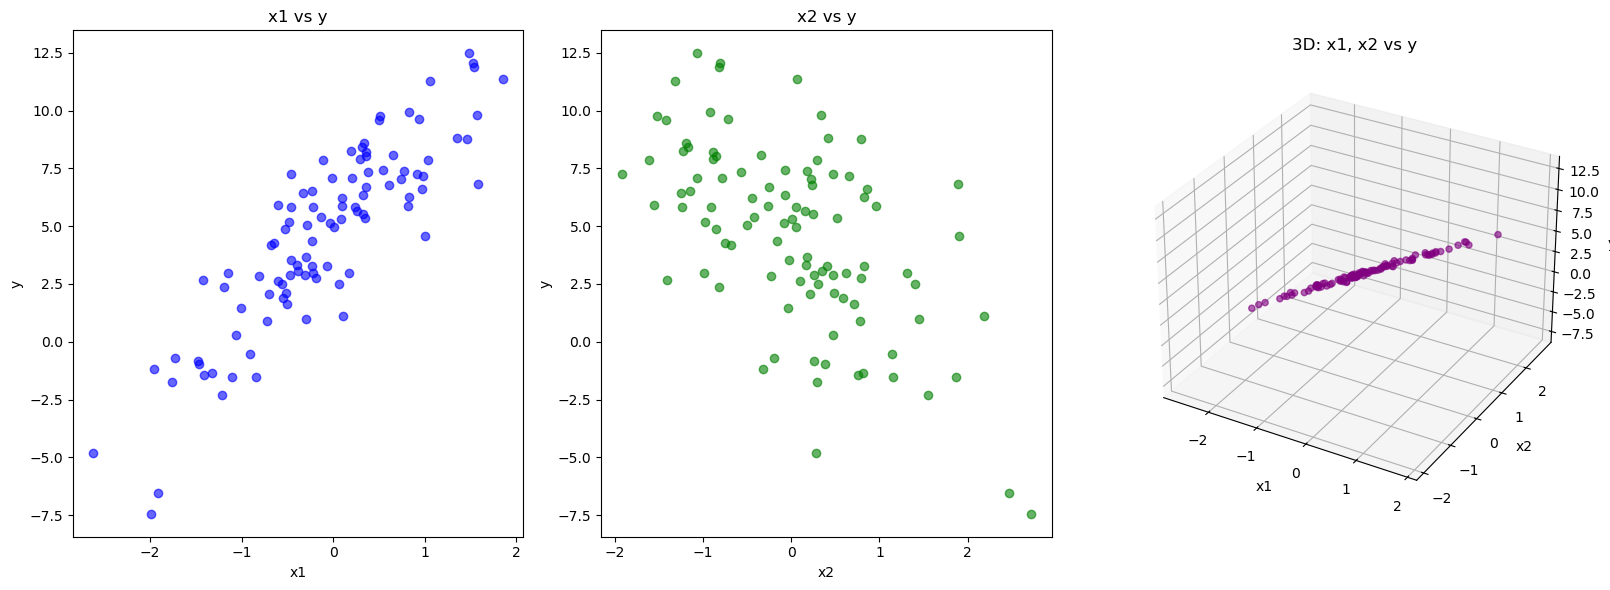

Determinant of (Xᵀ @ X): 721505.5337432632


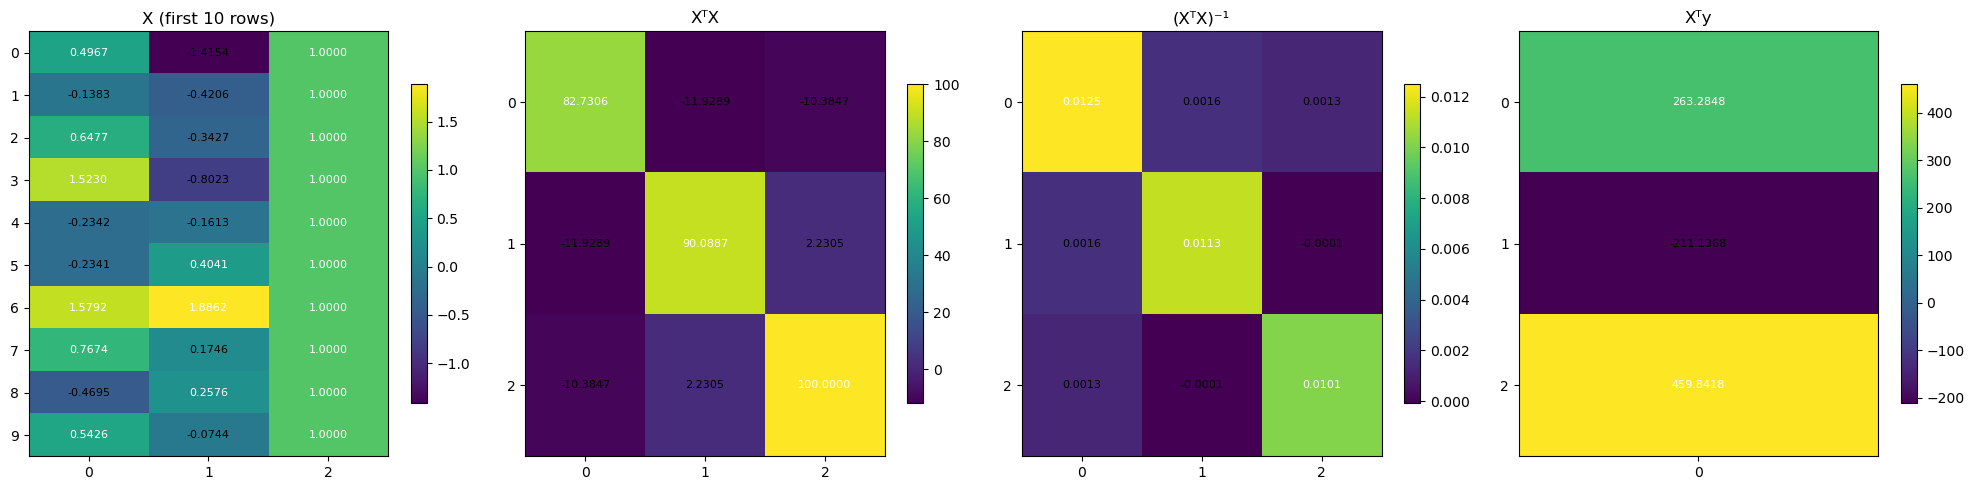

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# --- Step 1: Generate Data ---
a_true = 3.5
b_true = -2.0
c_true = 5.0
n_samples = 100

# Uncorrelated features
x1 = np.random.normal(0, 1, n_samples)
x2 = np.random.normal(0, 1, n_samples)
noise = np.random.normal(0, 0.1, n_samples)

# Output variable
y = a_true * x1 + b_true * x2 + c_true + noise

# Design matrix with bias (intercept) term
X = np.column_stack((x1, x2, np.ones(n_samples)))

# --- Step 2: Closed-Form Computation ---
XTX = X.T @ X
XTX_inv = np.linalg.inv(XTX)
XTy = X.T @ y
theta_hat = XTX_inv @ XTy

# --- Step 3: Visualization of Data ---
fig = plt.figure(figsize=(16, 6))

# Scatter plot of x1 vs y
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(x1, y, color='blue', alpha=0.6)
ax1.set_title('x1 vs y')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')

# Scatter plot of x2 vs y
ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(x2, y, color='green', alpha=0.6)
ax2.set_title('x2 vs y')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')

# 3D Scatter: x1, x2 vs y
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(x1, x2, y, color='purple', alpha=0.6)
ax3.set_title('3D: x1, x2 vs y')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')

plt.tight_layout()
plt.show()

# --- Step 4: Matrix Visualizations ---
def plot_matrix(matrix, title, ax, cmap='viridis'):
    im = ax.imshow(matrix, cmap=cmap, aspect='auto')
    ax.set_title(title)
    ax.set_xticks(range(matrix.shape[1]))
    ax.set_yticks(range(matrix.shape[0]))
    
    # Show values in each cell
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            val = matrix[i, j]
            ax.text(j, i, f"{val:.4f}", ha='center', va='center', color='white' if im.norm(val) > 0.5 else 'black', fontsize=8)

    plt.colorbar(im, ax=ax, shrink=0.75)

print("Determinant of (Xᵀ @ X):", np.linalg.det(X.T @ X))
fig2, axs = plt.subplots(1, 4, figsize=(20, 5))

plot_matrix(X[:10], 'X (first 10 rows)', axs[0])
plot_matrix(XTX, 'XᵀX', axs[1])
plot_matrix(XTX_inv, '(XᵀX)⁻¹', axs[2])
plot_matrix(XTy.reshape(-1, 1), 'Xᵀy', axs[3])

plt.tight_layout()
plt.show()


Correlation matrix of [x1, x2, x3]:
[[ 1.         -0.13642221  0.99282073]
 [-0.13642221  1.         -0.13673405]
 [ 0.99282073 -0.13673405  1.        ]]

Determinant of (Xᵀ @ X): 809089.0498295758

Estimated Parameters:
a (x1) ≈ 3.4567 (True: 3.5)
b (x2) ≈ -2.0038 (True: -2.0)
x3 coeff ≈ 0.0269 (Expected: close to x1's weight, but unstable due to collinearity)
c (intercept) ≈ 5.0088 (True: 5.0)


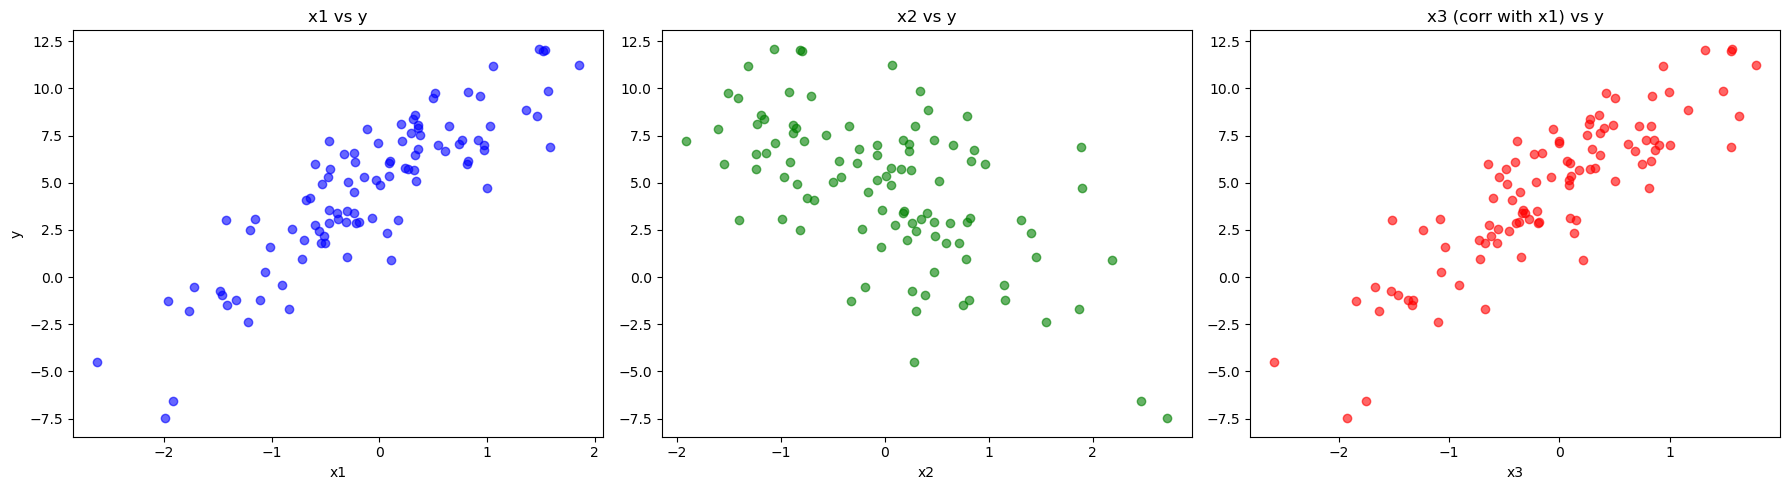

Determinant of (Xᵀ @ X): 809089.0498295758


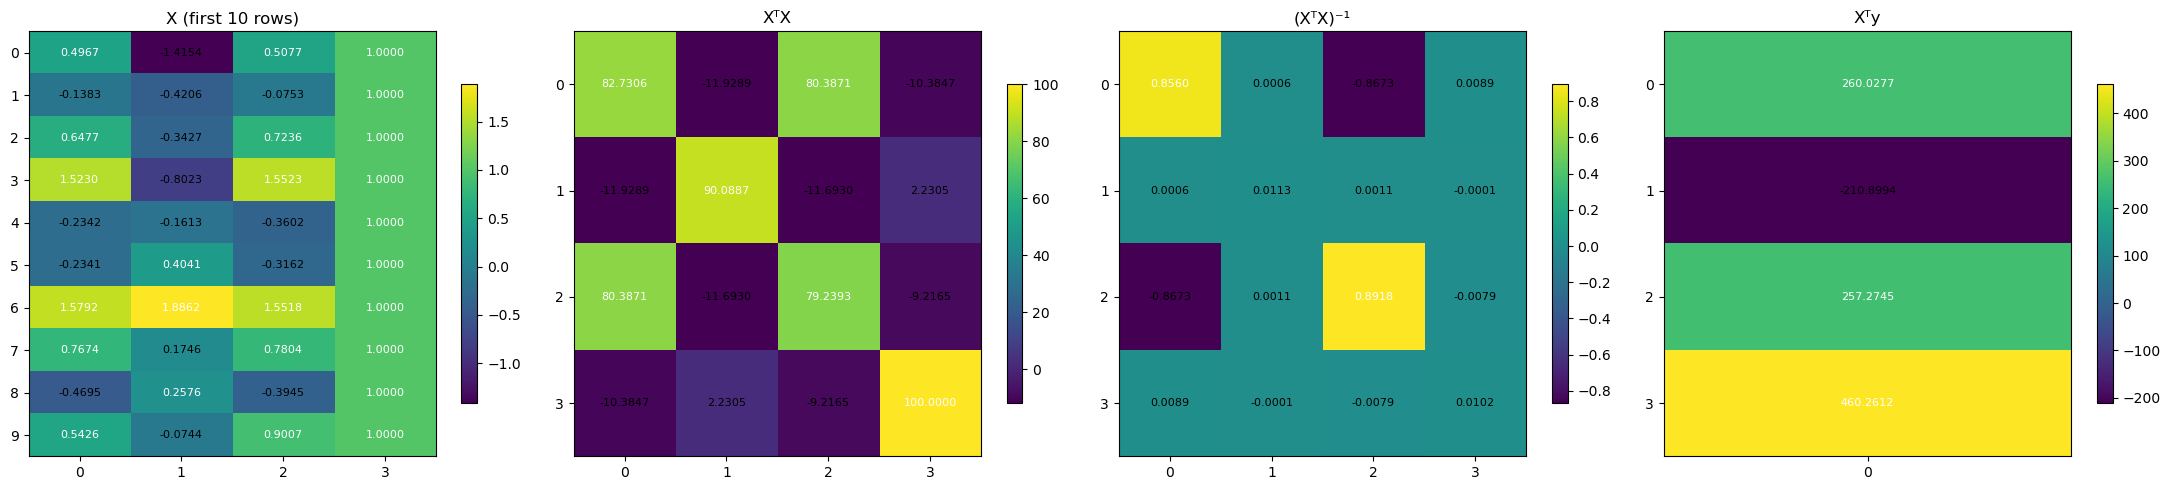

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# True parameters
a_true = 3.5
b_true = -2.0
c_true = 5.0

n_samples = 100

# Step 1: Generate features
x1 = np.random.normal(0, 1, n_samples)
x2 = np.random.normal(0, 1, n_samples)

# Generate x3 ~ 0.95 correlated with x1
rho = 0.95
x3 = rho * x1 + np.random.normal(0, 0.1, n_samples)

# Target variable
noise = np.random.normal(0, 0.1, n_samples)
y = a_true * x1 + b_true * x2 + c_true + noise

# Step 2: Build design matrix with bias term
X = np.column_stack((x1, x2, x3, np.ones(n_samples)))

# Step 3: Closed-form solution
XTX = X.T @ X
XTX_inv = np.linalg.inv(XTX)
XTy = X.T @ y
theta_hat = XTX_inv @ XTy

# Extract estimated params
a_hat, b_hat, x3_coef_hat, c_hat = theta_hat

# Print correlation matrix
print("\nCorrelation matrix of [x1, x2, x3]:")
print(np.corrcoef(np.stack([x1, x2, x3]), rowvar=True))

# Print determinant
print("\nDeterminant of (Xᵀ @ X):", np.linalg.det(XTX))

# Print estimated coefficients
print("\nEstimated Parameters:")
print(f"a (x1) ≈ {a_hat:.4f} (True: {a_true})")
print(f"b (x2) ≈ {b_hat:.4f} (True: {b_true})")
print(f"x3 coeff ≈ {x3_coef_hat:.4f} (Expected: close to x1's weight, but unstable due to collinearity)")
print(f"c (intercept) ≈ {c_hat:.4f} (True: {c_true})")

# Step 4: Visualization - x vs y
fig = plt.figure(figsize=(18, 5))

ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(x1, y, color='blue', alpha=0.6)
ax1.set_title('x1 vs y')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(x2, y, color='green', alpha=0.6)
ax2.set_title('x2 vs y')
ax2.set_xlabel('x2')

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(x3, y, color='red', alpha=0.6)
ax3.set_title('x3 (corr with x1) vs y')
ax3.set_xlabel('x3')

plt.tight_layout()
plt.show()

# Step 5: Matrix heatmaps with values
def plot_matrix(matrix, title, ax, cmap='viridis'):
    im = ax.imshow(matrix, cmap=cmap, aspect='auto')
    ax.set_title(title)
    ax.set_xticks(range(matrix.shape[1]))
    ax.set_yticks(range(matrix.shape[0]))

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            val = matrix[i, j]
            ax.text(j, i, f"{val:.4f}", ha='center', va='center',
                    color='white' if im.norm(val) > 0.5 else 'black', fontsize=8)

    plt.colorbar(im, ax=ax, shrink=0.75)
print("Determinant of (Xᵀ @ X):", np.linalg.det(X.T @ X))

fig2, axs = plt.subplots(1, 4, figsize=(22, 5))
plot_matrix(X[:10], 'X (first 10 rows)', axs[0])
plot_matrix(XTX, 'XᵀX', axs[1])
plot_matrix(XTX_inv, '(XᵀX)⁻¹', axs[2])
plot_matrix(XTy.reshape(-1, 1), 'Xᵀy', axs[3])
plt.tight_layout()
plt.show()

In [7]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np

# -- Reuse same data from before or rerun the same data generation --
# x1, x2, x3, y already created
# Stack into matrix X_lasso
X_lasso = np.column_stack((x1, x2, x3))

# Important: Scale features for Lasso to work properly
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_lasso)

# Lasso Regression with alpha (λ) parameter
lasso = Lasso(alpha=0.1)  # You can tune this value
lasso.fit(X_scaled, y)

# Extract coefficients
coef = lasso.coef_
intercept = lasso.intercept_

# Print results
print("\nLasso Estimated Parameters:")
print(f"a (x1)       ≈ {coef[0]:.4f}")
print(f"b (x2)       ≈ {coef[1]:.4f}")
print(f"x3 (corr x1) ≈ {coef[2]:.4f}")
print(f"intercept    ≈ {intercept:.4f}")


Lasso Estimated Parameters:
a (x1)       ≈ 3.0592
b (x2)       ≈ -1.8134
x3 (corr x1) ≈ 0.0000
intercept    ≈ 4.6026


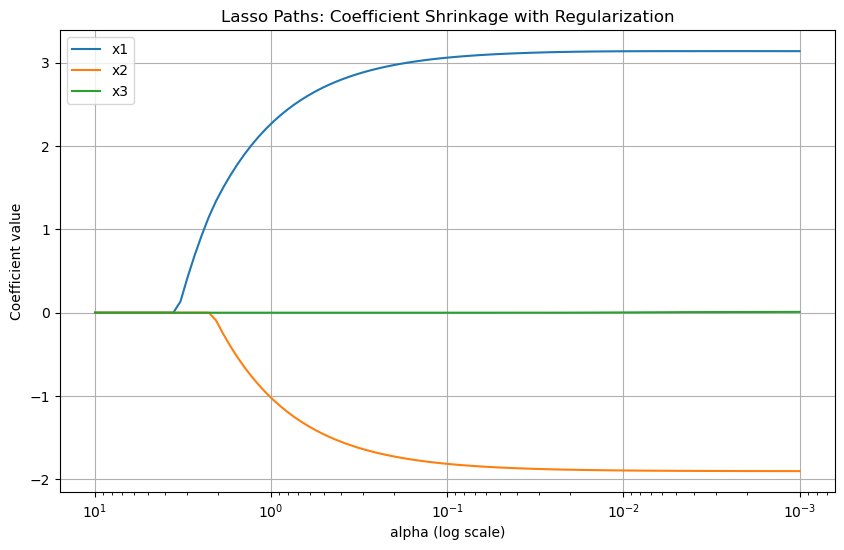

In [8]:
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path

# Compute Lasso path
alphas, coefs, _ = lasso_path(X_scaled, y, alphas=np.logspace(-3, 1, 100))

# Plot the coefficient path
plt.figure(figsize=(10, 6))
for i, feature in enumerate(['x1', 'x2', 'x3']):
    plt.plot(alphas, coefs[i], label=feature)

plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('alpha (log scale)')
plt.ylabel('Coefficient value')
plt.title('Lasso Paths: Coefficient Shrinkage with Regularization')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reusing previous setup
np.random.seed(42)
n_samples = 100
x1 = np.random.normal(0, 1, n_samples)
x2 = np.random.normal(0, 1, n_samples)
x3 = 0.95 * x1 + np.random.normal(0, 0.1, n_samples)

a, b, c = 3.5, -2.0, 5.0
noise = np.random.normal(0, 0.1, n_samples)
y = a * x1 + b * x2 + c + noise

def fit_and_report(X, label):
    X_with_bias = np.column_stack((X, np.ones(X.shape[0])))
    theta = np.linalg.inv(X_with_bias.T @ X_with_bias) @ (X_with_bias.T @ y)
    preds = X_with_bias @ theta
    mse = np.mean((preds - y) ** 2)

    print(f"\n{label}:")
    for i, val in enumerate(theta[:-1]):
        print(f"  Coef {i} = {val:.4f}")
    print(f"  Intercept = {theta[-1]:.4f}")
    print(f"  MSE = {mse:.4f}")
    return theta, preds

# Case 1: Full Model
theta_full, pred_full = fit_and_report(np.column_stack((x1, x2, x3)), "Full Model (x1, x2, x3)")

# Case 2: Without x3
theta_no_x3, pred_no_x3 = fit_and_report(np.column_stack((x1, x2)), "No x3 (x1, x2)")

# Case 3: Without x1
theta_no_x1, pred_no_x1 = fit_and_report(np.column_stack((x2, x3)), "No x1 (x2, x3)")


Full Model (x1, x2, x3):
  Coef 0 = 3.4567
  Coef 1 = -2.0038
  Coef 2 = 0.0269
  Intercept = 5.0088
  MSE = 0.0075

No x3 (x1, x2):
  Coef 0 = 3.4829
  Coef 1 = -2.0039
  Intercept = 5.0090
  MSE = 0.0075

No x1 (x2, x3):
  Coef 0 = -2.0061
  Coef 1 = 3.5292
  Intercept = 4.9726
  MSE = 0.1471


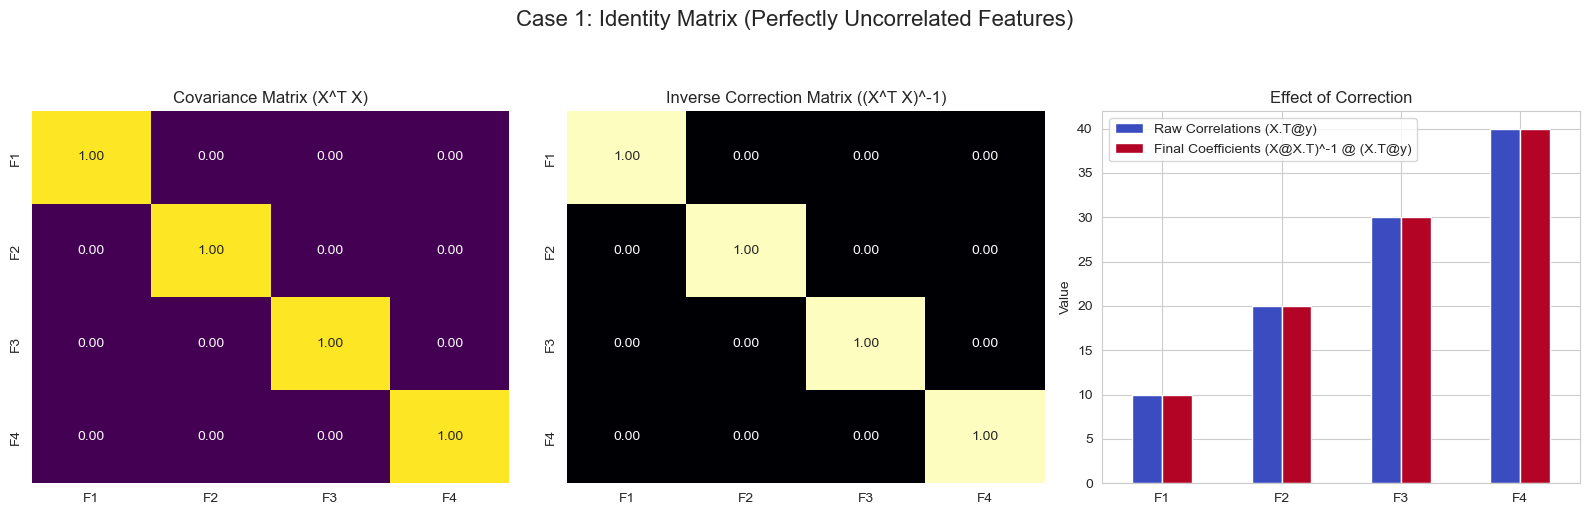

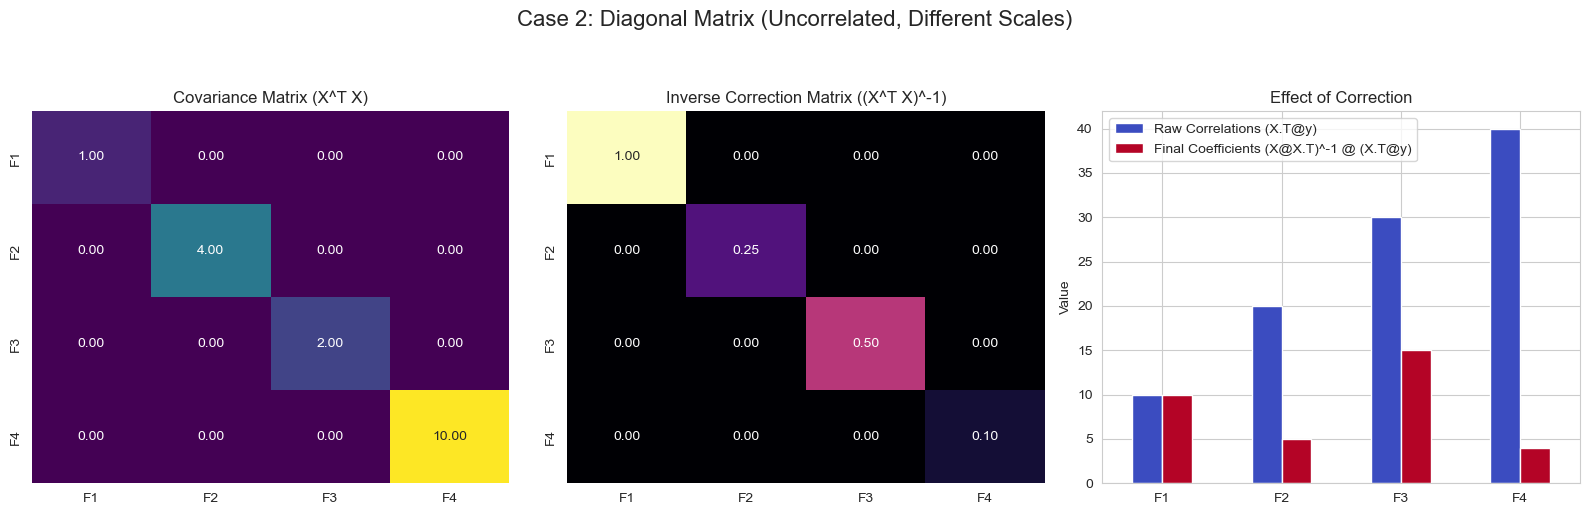

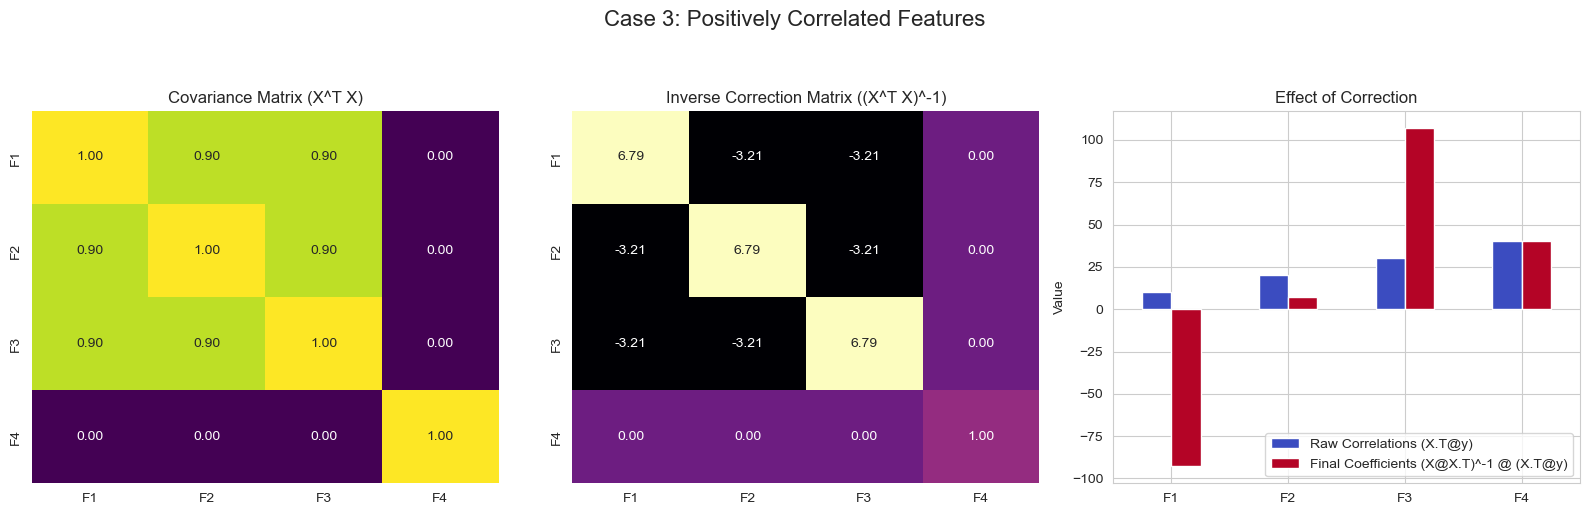

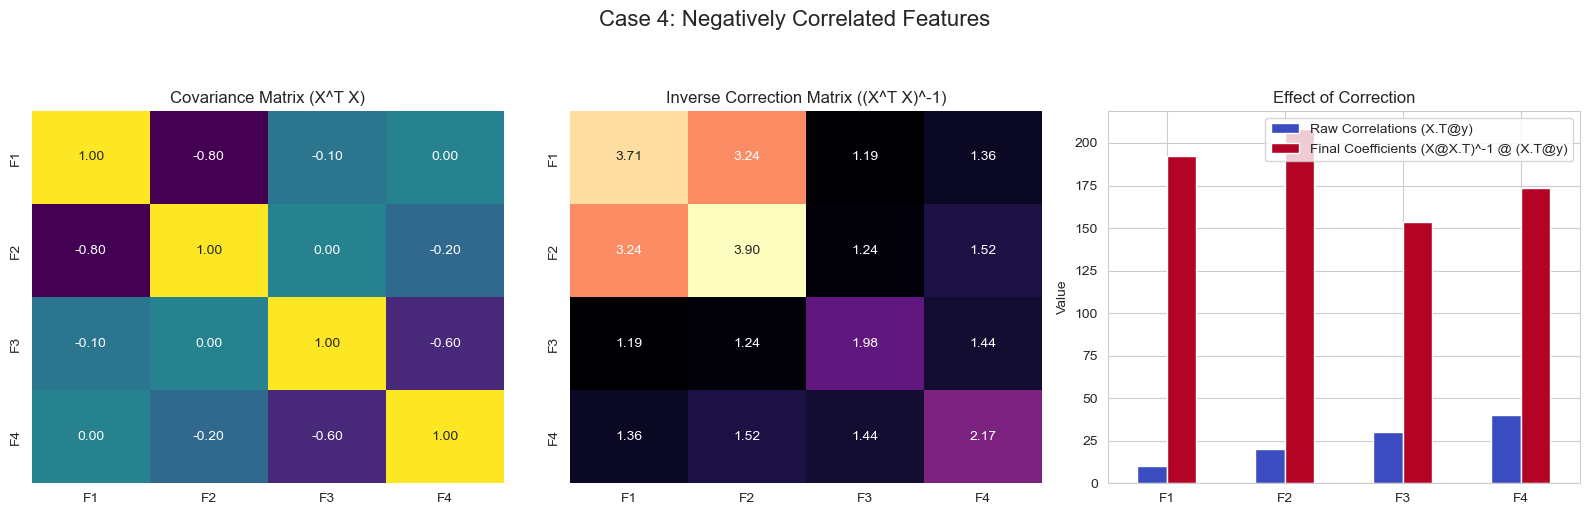

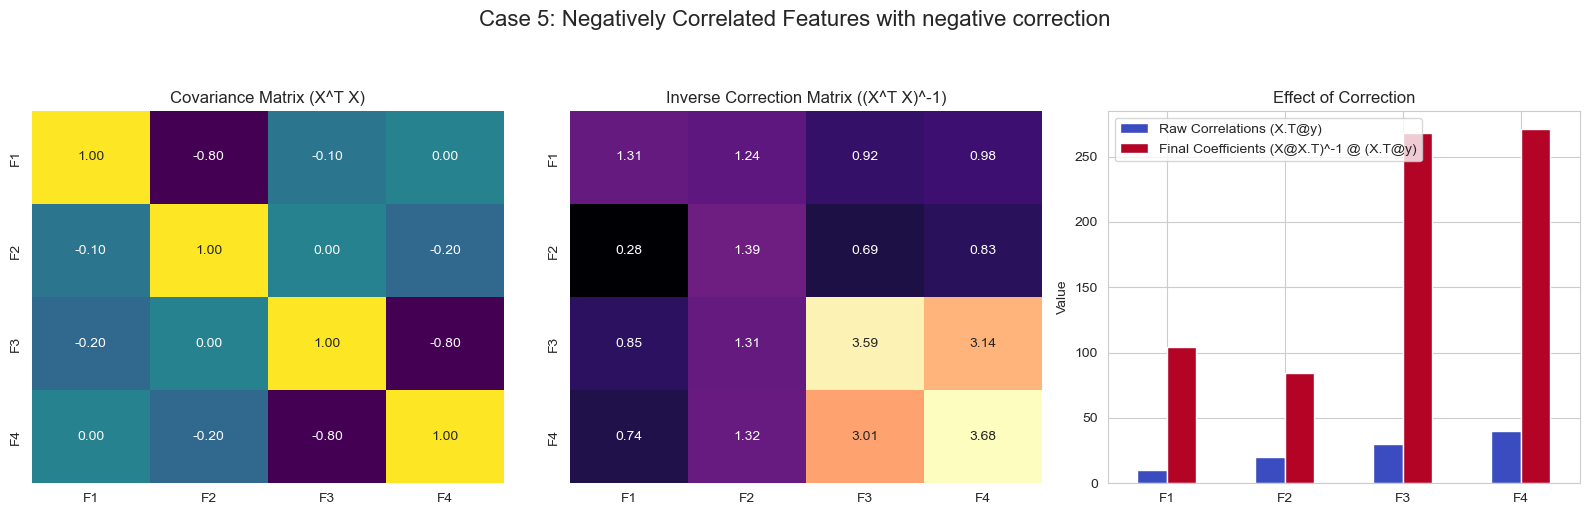

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set a consistent style
sns.set_style("whitegrid")

def analyze_correction_effect(xtx_matrix, xt_y_vector, title):
    """
    Analyzes and plots the effect of a correction matrix on a raw correlation vector.
    """
    # Ensure the matrix is 4x4
    if xtx_matrix.shape != (4, 4):
        raise ValueError("The input matrix must be 4x4.")

    # Calculate the inverse
    xtx_inv = np.linalg.inv(xtx_matrix)

    # Calculate the final coefficients
    theta = xtx_inv @ xt_y_vector

    # Create plots
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    fig.suptitle(title, fontsize=16, y=1.02)
    labels = ['F1', 'F2', 'F3', 'F4']

    # Plot the Covariance Matrix (X^T X)
    sns.heatmap(xtx_matrix, annot=True, fmt='.2f', cmap='viridis', ax=axes[0],
                xticklabels=labels, yticklabels=labels, cbar=False)
    axes[0].set_title('Covariance Matrix (X^T X)')

    # Plot the Inverse Correction Matrix ((X^T X)^-1)
    sns.heatmap(xtx_inv, annot=True, fmt='.2f', cmap='magma', ax=axes[1],
                xticklabels=labels, yticklabels=labels, cbar=False)
    axes[1].set_title('Inverse Correction Matrix ((X^T X)^-1)')

    # Plot the XT_y vector ((X^T y))
    # sns.heatmap([xt_y_vector] * len(xt_y_vector), annot=True, fmt='.2f', cmap='magma', ax=axes[2],
    #             xticklabels=labels, yticklabels=labels, cbar=False)
    # axes[2].set_title('Plot XT_y vector')

    # Plot the effect on X^T y
    df = pd.DataFrame({'Raw Correlations (X.T@y)': xt_y_vector, 'Final Coefficients (X@X.T)^-1 @ (X.T@y)': theta}, index=labels)
    df.plot(kind='bar', ax=axes[2], colormap='coolwarm')
    axes[2].set_title('Effect of Correction')
    axes[2].set_ylabel('Value')
    axes[2].tick_params(axis='x', rotation=0)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Define the hypothetical raw correlation vector
xt_y = np.array([10, 20, 30, 40])

# --- Case 1: Identity Matrix (Uncorrelated, Same Variance) ---
xtx_identity = np.identity(4)
analyze_correction_effect(xtx_identity, xt_y, "Case 1: Identity Matrix (Perfectly Uncorrelated Features)")

# --- Case 2: Diagonal Matrix (Uncorrelated, Different Variances) ---
xtx_diagonal = np.diag([1, 4, 2, 10]) # Features have different scales/variances
analyze_correction_effect(xtx_diagonal, xt_y, "Case 2: Diagonal Matrix (Uncorrelated, Different Scales)")

# --- Case 3: Positive Correlation Matrix ---
xtx_positive = np.array([
    [1.0, 0.9, 0.9, 0.0],
    [0.9, 1.0, 0.9, 0.0],
    [0.9, 0.9, 1.0, 0.0],
    [0.0, 0.0, 0.0, 1.0]
])
analyze_correction_effect(xtx_positive, xt_y, "Case 3: Positively Correlated Features")

# --- Case 4: Negative Correlation Matrix ---
xtx_negative = np.array([
    [1.0, -0.8, -0.1, 0.0],
    [-0.8, 1.0, 0.0, -0.2],
    [-0.1, 0.0, 1.0, -0.6],
    [0.0, -0.2, -0.6, 1.0]
])
analyze_correction_effect(xtx_negative, xt_y, "Case 4: Negatively Correlated Features")

# --- Case 5: Negative Correlation Matrix ---
xtx_negative = np.array([
    
        [ 1.0, -0.8, -0.1,  0.0],
        [-0.1,  1.0,  0.0, -0.2],
        [-0.2,  0.0,  1.0, -0.8],
        [ 0.0, -0.2, -0.8,  1.0]
    
])
analyze_correction_effect(xtx_negative, xt_y, "Case 5: Negatively Correlated Features with negative correction")


/var/folders/h3/qqtnz2p16_gdpmpsczh0d3zh0000gn/T/ipykernel_53079/4003110752.py:31: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  synthetic_data = np.random.multivariate_normal(mean_vector, target_cov_matrix, size=num_samples)



--- Partial Correlation Analysis ---
Building models to predict F2 and F3 from F1 and F4...
F2 params [-0.70782567 -0.1033554 ]
F3 params [-0.3111918  -0.72367282]
Correlation of 'surprise' numbers (residuals) for F2 and F3: -0.5671
This negative value confirms our theory: after accounting for common drivers, F2 and F3 are negatively correlated.

Generating plot of residuals...


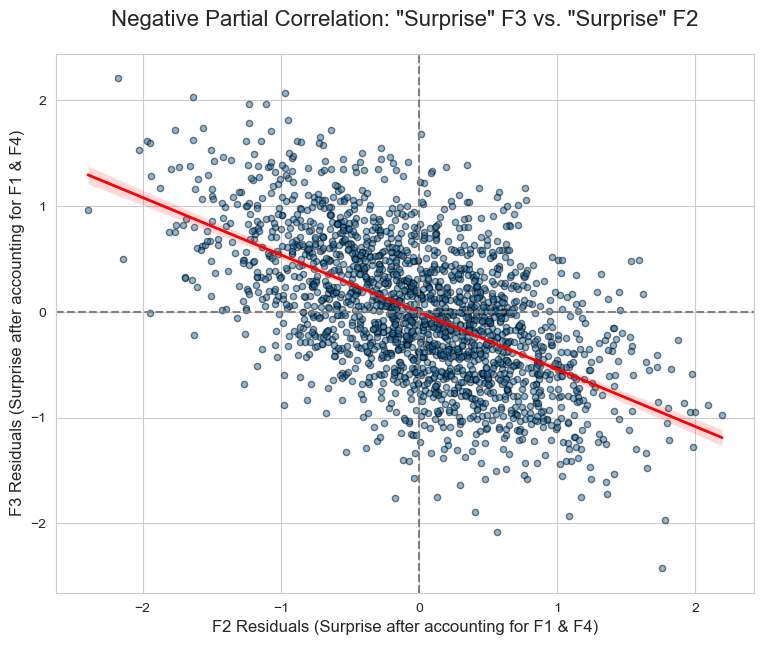


Generating original scatter matrix plot...


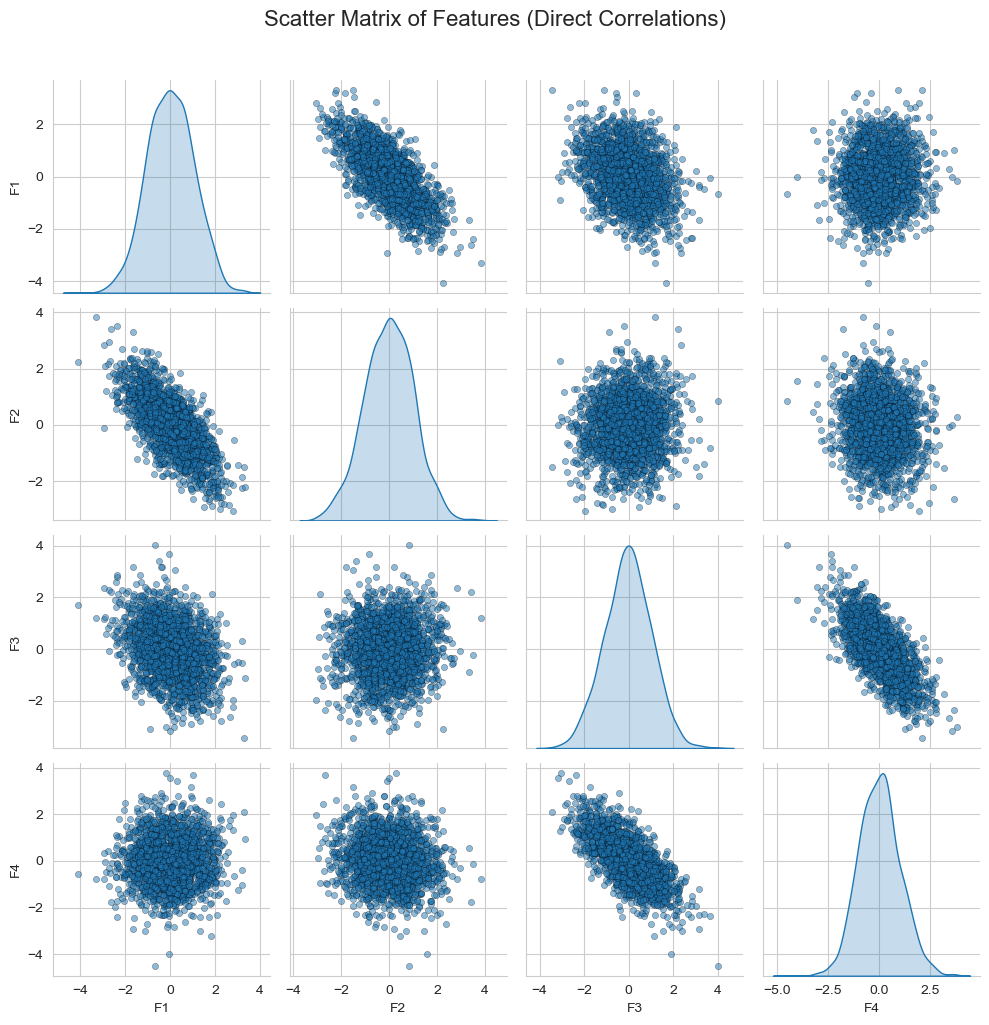

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

def generate_and_plot_data_with_covariance():
    """
    Generates a dataset with a predefined covariance matrix, demonstrates
    partial correlation by extracting residuals, and plots the relationships.
    """
    # --- 1. Define the Target Covariance Matrix ---
    # This matrix is extracted from the "Covariance Matrix" plot in the user-provided image.
    # It represents the desired covariance structure for our synthetic data.
    target_cov_matrix = np.array([
        [ 1.0, -0.8, -0.4,  0.0],
        [-0.8,  1.0,  0.0, -0.2],
        [-0.4,  0.0,  1.0, -0.8],
        [ 0.0, -0.2, -0.8,  1.0]
    ])

    # Define the mean for each feature. A zero mean is standard for this type of simulation.
    mean_vector = np.array([0, 0, 0, 0])

    # Define the number of data points (samples) to generate.
    num_samples = 2000

    # --- 2. Generate the Synthetic Data ---
    # We use a multivariate normal distribution to generate data points that adhere
    # to the specified mean and covariance structure.
    synthetic_data = np.random.multivariate_normal(mean_vector, target_cov_matrix, size=num_samples)

    # --- 3. Create a Pandas DataFrame ---
    # For ease of use and plotting, we'll convert the NumPy array into a Pandas DataFrame.
    feature_names = ['F1', 'F2', 'F3', 'F4']
    df = pd.DataFrame(synthetic_data, columns=feature_names)

    # --- 4. Isolate Partial Correlation by "Removing" Effects of F1 and F4 ---
    # To demonstrate the concept of partial correlation intuitively, we use
    # linear regression to "control for" the effects of F1 and F4.

    print("\n--- Partial Correlation Analysis ---")
    print("Building models to predict F2 and F3 from F1 and F4...")

    # Define the predictors (F1, F4) and the target variables (F2, F3)
    X_predictors = df[['F1', 'F4']]
    y_f2 = df['F2']
    y_f3 = df['F3']

    # --- Model for F2 ---
    # Predict F2 using F1 and F4 to find what's left over.
    model_f2 = LinearRegression()
    model_f2.fit(X_predictors, y_f2)
    f2_predicted = model_f2.predict(X_predictors)
    print("F2 params", model_f2.coef_)
    # The residuals are the "surprise" values for F2 not explained by F1 & F4.
    f2_residuals = y_f2 - f2_predicted

    # --- Model for F3 ---
    # Predict F3 using F1 and F4 to find what's left over.
    model_f3 = LinearRegression()
    model_f3.fit(X_predictors, y_f3)
    f3_predicted = model_f3.predict(X_predictors)
    print("F3 params", model_f3.coef_)
    # The residuals are the "surprise" values for F3 not explained by F1 & F4.
    f3_residuals = y_f3 - f3_predicted

    # --- Calculate and Print the Partial Correlation ---
    # The correlation between the residuals IS the partial correlation of F2 and F3.
    partial_corr = np.corrcoef(f2_residuals, f3_residuals)[0, 1]
    print(f"Correlation of 'surprise' numbers (residuals) for F2 and F3: {partial_corr:.4f}")
    print("This negative value confirms our theory: after accounting for common drivers, F2 and F3 are negatively correlated.")

    # --- 5. Plot the Residuals (The "Surprise" Numbers) ---
    print("\nGenerating plot of residuals...")
    plt.figure(figsize=(9, 7))
    sns.regplot(x=f2_residuals, y=f3_residuals,
                scatter_kws={'alpha': 0.5, 's': 20, 'edgecolor': 'k'},
                line_kws={'color': 'red', 'linewidth': 2})
    plt.title('Negative Partial Correlation: "Surprise" F3 vs. "Surprise" F2', fontsize=16, pad=20)
    plt.xlabel('F2 Residuals (Surprise after accounting for F1 & F4)', fontsize=12)
    plt.ylabel('F3 Residuals (Surprise after accounting for F1 & F4)', fontsize=12)
    plt.grid(True)
    plt.axhline(0, color='grey', linestyle='--')
    plt.axvline(0, color='grey', linestyle='--')
    plt.show()

    # --- 6. Plot the Original Scatter Matrix ---
    # This plot shows the direct relationships, including the zero correlation for F2 vs F3.
    print("\nGenerating original scatter matrix plot...")
    sns.set_style("whitegrid")
    pair_plot = sns.pairplot(df, kind='scatter', diag_kind='kde',
                             plot_kws={'alpha': 0.5, 's': 20, 'edgecolor': 'k'},
                             diag_kws={'fill': True})
    pair_plot.fig.suptitle('Scatter Matrix of Features (Direct Correlations)', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    generate_and_plot_data_with_covariance()


--- Target Covariance Matrix ---
[[ 1.  -0.8 -0.1  0. ]
 [-0.8  1.   0.  -0.2]
 [-0.1  0.   1.  -0.6]
 [ 0.  -0.2 -0.6  1. ]]

--- Covariance of Generated Data (should be similar to target) ---
          F1        F2        F3        F4
F1  0.975401 -0.788859 -0.095801  0.008333
F2 -0.788859  1.000050 -0.020254 -0.200359
F3 -0.095801 -0.020254  0.946474 -0.550019
F4  0.008333 -0.200359 -0.550019  0.977763

Generating scatter matrix plot...


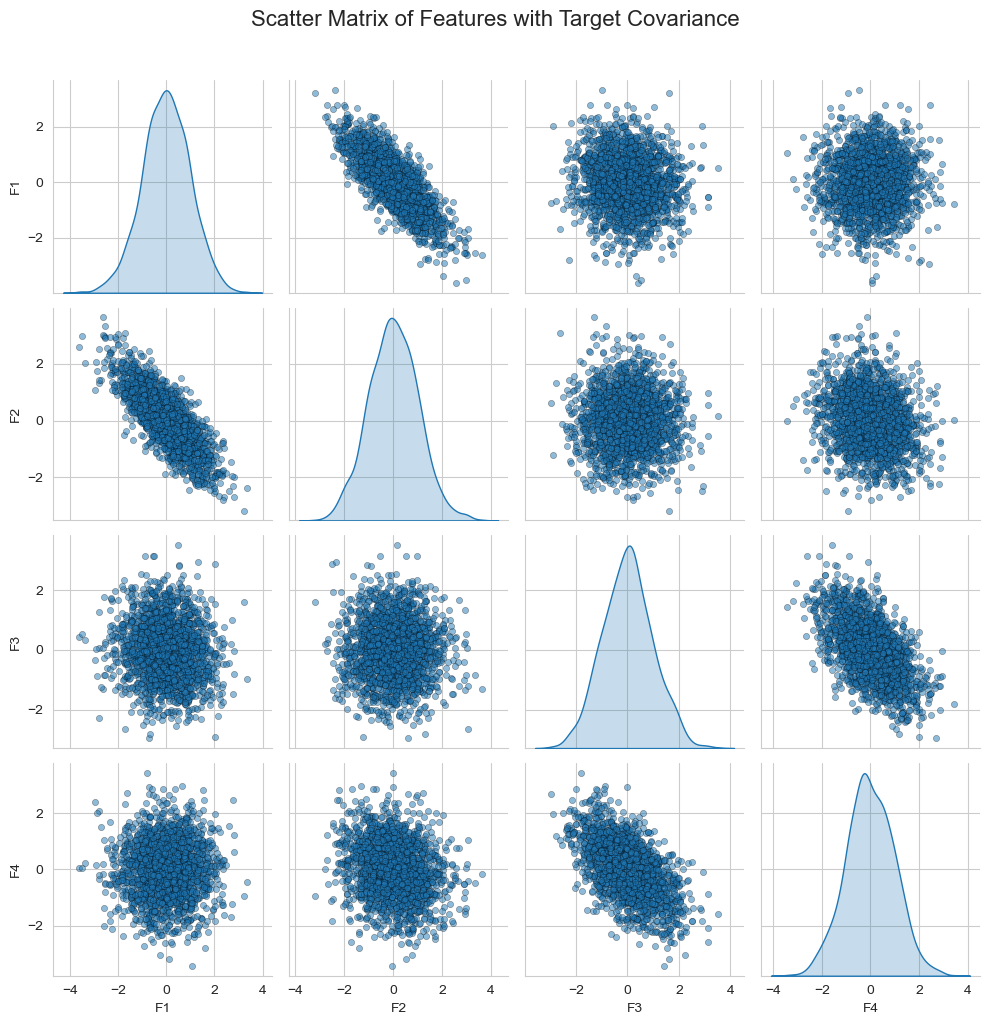

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def generate_and_plot_data_with_covariance():
    """
    Generates a dataset with a predefined covariance matrix and plots a
    scatter matrix to visualize the feature relationships.
    """
    # --- 1. Define the Target Covariance Matrix ---
    # This matrix is extracted from the "Covariance Matrix" plot in the user-provided image.
    # It represents the desired covariance structure for our synthetic data.
    target_cov_matrix = np.array([
        [ 1.0, -0.8, -0.1,  0.0],
        [-0.1,  1.0,  0.0, -0.2],
        [-0.2,  0.0,  1.0, -0.8],
        [ 0.0, -0.2, -0.8,  1.0]
    ])

    target_cov_matrix = np.array([
    [1.0, -0.8, -0.1, 0.0],
    [-0.8, 1.0, 0.0, -0.2],
    [-0.1, 0.0, 1.0, -0.6],
    [0.0, -0.2, -0.6, 1.0]
])

    # Define the mean for each feature. A zero mean is standard for this type of simulation.
    mean_vector = np.array([0, 0, 0, 0])

    # Define the number of data points (samples) to generate.
    num_samples = 2000

    # --- 2. Generate the Synthetic Data ---
    # We use a multivariate normal distribution to generate data points that adhere
    # to the specified mean and covariance structure.
    # A check is performed to ensure the covariance matrix is positive semi-definite.
    try:
        np.linalg.cholesky(target_cov_matrix)
    except np.linalg.LinAlgError:
        print("Error: The target covariance matrix is not positive semi-definite.")
        return

    synthetic_data = np.random.multivariate_normal(mean_vector, target_cov_matrix, size=num_samples)

    # --- 3. Create a Pandas DataFrame ---
    # For ease of use and plotting, we'll convert the NumPy array into a Pandas DataFrame.
    feature_names = ['F1', 'F2', 'F3', 'F4']
    df = pd.DataFrame(synthetic_data, columns=feature_names)

    # --- 4. (Optional) Verify the Covariance of the Generated Data ---
    # We can calculate the covariance of our generated data to see how closely
    # it matches our target matrix. With enough samples, it should be very close.
    print("--- Target Covariance Matrix ---")
    print(target_cov_matrix)
    print("\n--- Covariance of Generated Data (should be similar to target) ---")
    # Using .cov() on the dataframe calculates the sample covariance
    print(df.cov())
    
    # --- 5. Plot the Scatter Matrix ---
    # This creates a grid of plots showing the relationship between each pair of features.
    # The diagonal shows the distribution of each individual feature (we'll use a KDE).
    print("\nGenerating scatter matrix plot...")
    sns.set_style("whitegrid")
    
    # Use pairplot from seaborn for a more aesthetic plot
    pair_plot = sns.pairplot(df, kind='scatter', diag_kind='kde',
                             plot_kws={'alpha': 0.5, 's': 20, 'edgecolor': 'k'},
                             diag_kws={'fill': True})
                             
    pair_plot.fig.suptitle('Scatter Matrix of Features with Target Covariance', y=1.02, fontsize=16)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    generate_and_plot_data_with_covariance()


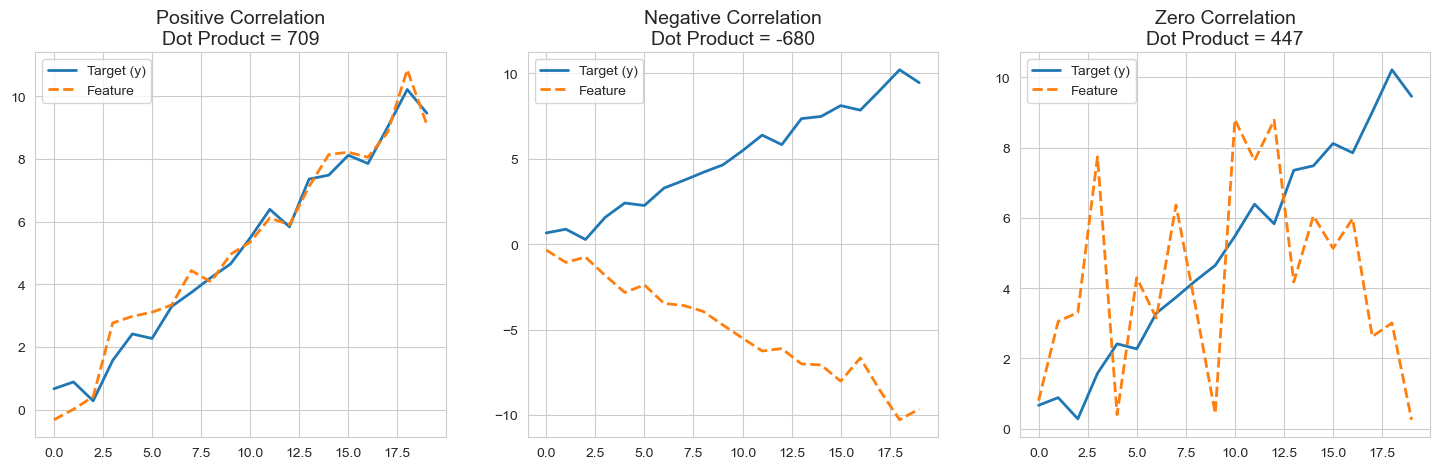

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Intuition Builder: Visualizing the Dot Product as Correlation ---
np.random.seed(10)
# Create a simple target variable
y_target = np.linspace(0, 10, 20) + np.random.normal(0, 0.5, 20)

# Create three features
feature_pos = y_target + np.random.normal(0, 0.5, 20) # Positively correlated
feature_neg = -y_target + np.random.normal(0, 0.5, 20) # Negatively correlated
feature_zero = np.random.uniform(0, 10, 20) # No correlation

# Calculate dot products (our X^T y scores)
dot_pos = feature_pos.T @ y_target
dot_neg = feature_neg.T @ y_target
dot_zero = feature_zero.T @ y_target

# Visualize
sns.set_style("whitegrid")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
# fig.suptitle('Visualizing Xᵀy: How the Dot Product Measures Correlation', fontsize=18)

ax1.plot(y_target, label='Target (y)', lw=2)
ax1.plot(feature_pos, label='Feature', linestyle='--', lw=2)
ax1.set_title(f'Positive Correlation\nDot Product = {dot_pos:.0f}', fontsize=14)
ax1.legend()

ax2.plot(y_target, label='Target (y)', lw=2)
ax2.plot(feature_neg, label='Feature', linestyle='--', lw=2)
ax2.set_title(f'Negative Correlation\nDot Product = {dot_neg:.0f}', fontsize=14)
ax2.legend()

ax3.plot(y_target, label='Target (y)', lw=2)
ax3.plot(feature_zero, label='Feature', linestyle='--', lw=2)
ax3.set_title(f'Zero Correlation\nDot Product = {dot_zero:.0f}', fontsize=14)
ax3.legend()

plt.show()

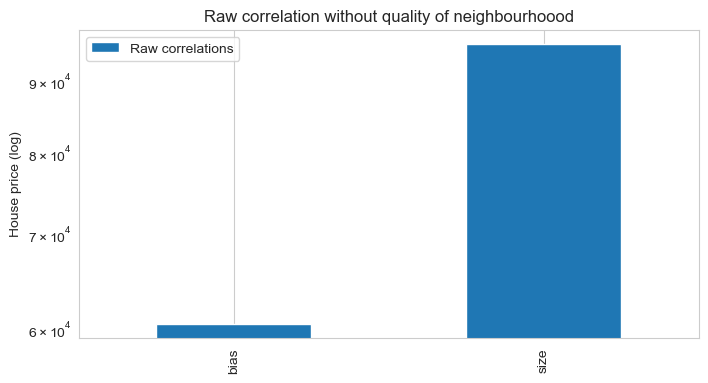

In [56]:
np.random.seed(0)
# Create 200 data points
n_samples = 200

# Feature 1: House Size in thousands of square feet
size_in_k_sqft = np.random.normal(1.5, 0.3, n_samples)

# Feature 2: Neighborhood Quality (correlated with size)
quality_of_neighborhood = size_in_k_sqft + np.random.normal(0, 0.2, n_samples)

# True Target: Price in Grands (thousands of dollars)
# Only depends on size
y_grands = 200 * size_in_k_sqft + np.random.normal(0, 20, n_samples)

# Create our feature matrix with ONLY size
X_simple = np.c_[np.ones(n_samples), size_in_k_sqft]

# Calculate Raw Correlation Vector
raw_corr_simple = X_simple.T @ y_grands

raw_corr_simple_df = pd.DataFrame({
    'Raw correlations': raw_corr_simple,
}, index=['bias', 'size'])
raw_corr_simple_df.plot(kind='bar', figsize=(8, 4))
plt.title('Raw correlation without quality of neighbourhoood')
plt.ylabel('House price (log)')
plt.yscale('log')
plt.show()

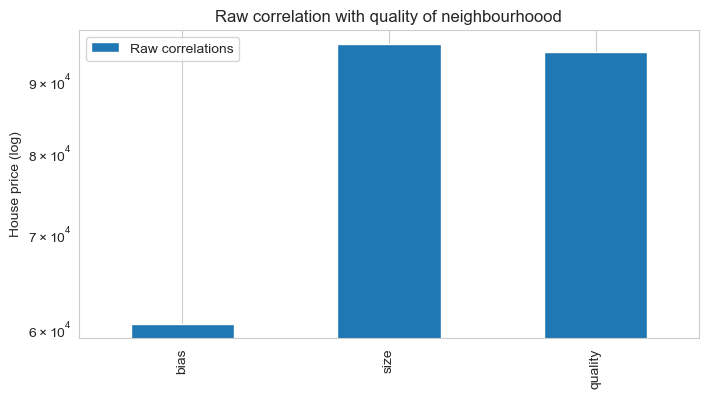

In [58]:
# Create our feature matrix with ONLY size
X_simple = np.c_[np.ones(n_samples), size_in_k_sqft, quality_of_neighborhood]

# Calculate Raw Correlation Vector
raw_corr_simple = X_simple.T @ y_grands

raw_corr_simple_df = pd.DataFrame({
    'Raw correlations': raw_corr_simple,
}, index=['bias', 'size', 'quality'])
raw_corr_simple_df.plot(kind='bar', figsize=(8, 4))
plt.title('Raw correlation with quality of neighbourhoood')
plt.ylabel('House price (log)')
plt.yscale('log')
plt.show()

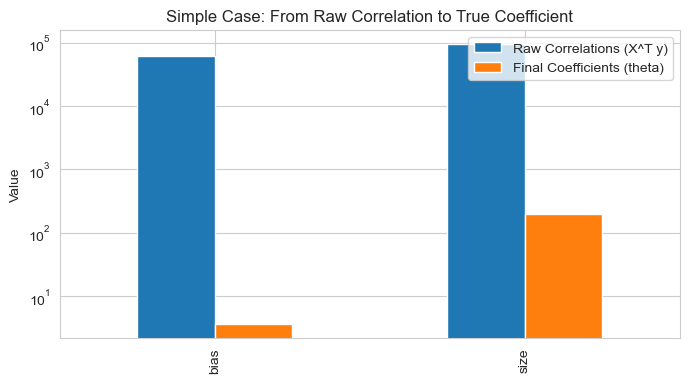

Final Coefficients (Simple Case):
 [  3.70309846 196.14924484]


In [59]:
# Create our feature matrix with ONLY size
X_simple = np.c_[np.ones(n_samples), size_in_k_sqft]

# Calculate Raw Correlation Vector
raw_corr_simple = X_simple.T @ y_grands

# Calculate the Correction Matrix
XTX_inv_simple = np.linalg.inv(X_simple.T @ X_simple)

# The final calculation
theta_simple = XTX_inv_simple @ raw_corr_simple

# Plotting the comparison
results_simple = pd.DataFrame({
    'Raw Correlations (X^T y)': raw_corr_simple,
    'Final Coefficients (theta)': theta_simple
}, index=['bias', 'size'])

results_simple.plot(kind='bar', figsize=(8, 4))
plt.title('Simple Case: From Raw Correlation to True Coefficient')
plt.ylabel('Value')
plt.yscale('log')
plt.show()

print("Final Coefficients (Simple Case):\n", theta_simple)


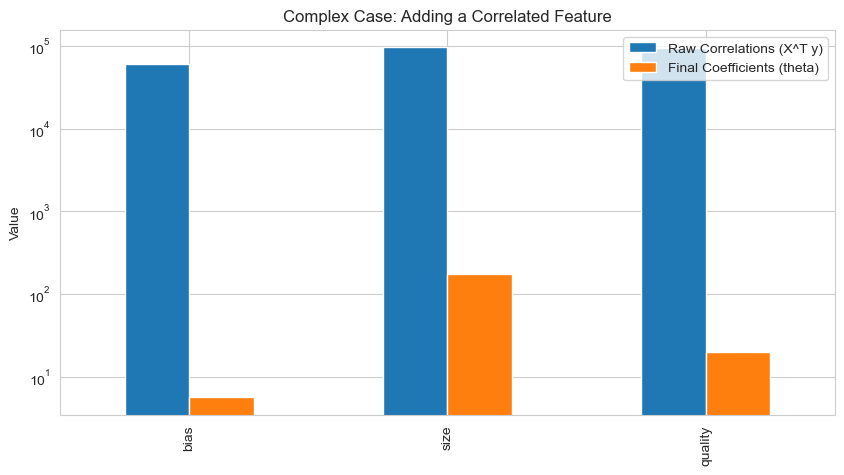

Final Coefficients (Full Case):
 [  5.64281531 175.09507736  20.11768488]


In [60]:
# Create the full feature matrix with the correlated feature
X_full = np.c_[np.ones(n_samples), size_in_k_sqft, quality_of_neighborhood]

# Calculate the new Raw Correlation Vector
raw_corr_full = X_full.T @ y_grands

# Calculate the new Correction Matrix
XTX_inv_full = np.linalg.inv(X_full.T @ X_full)

# The final calculation
theta_full = XTX_inv_full @ raw_corr_full

# Plotting the comparison
results_full = pd.DataFrame({
    'Raw Correlations (X^T y)': raw_corr_full,
    'Final Coefficients (theta)': theta_full
}, index=['bias', 'size', 'quality'])

results_full.plot(kind='bar', figsize=(10, 5))
plt.title('Complex Case: Adding a Correlated Feature')
plt.ylabel('Value')
plt.yscale('log')
plt.show()

print("Final Coefficients (Full Case):\n", theta_full)

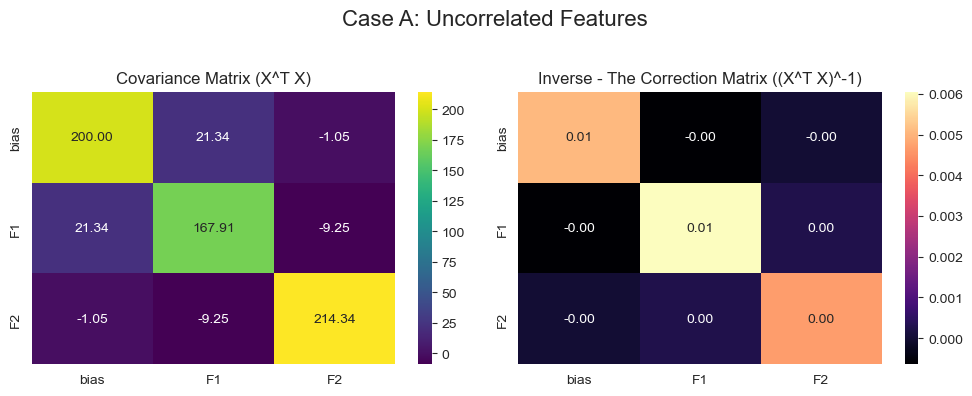

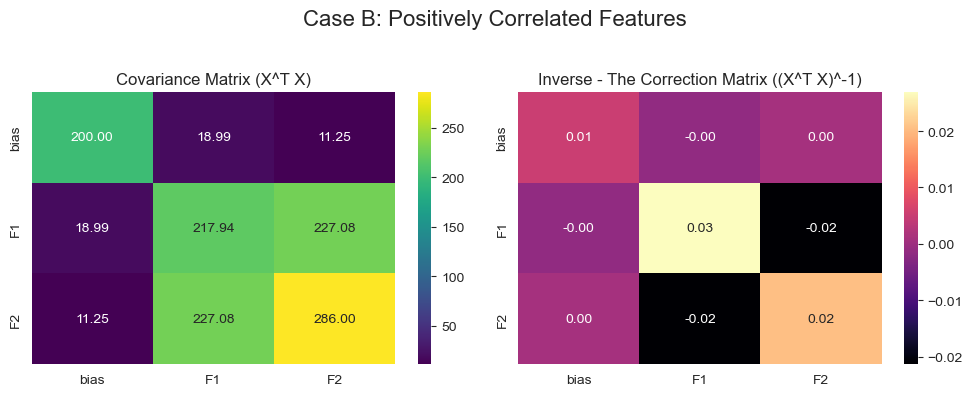

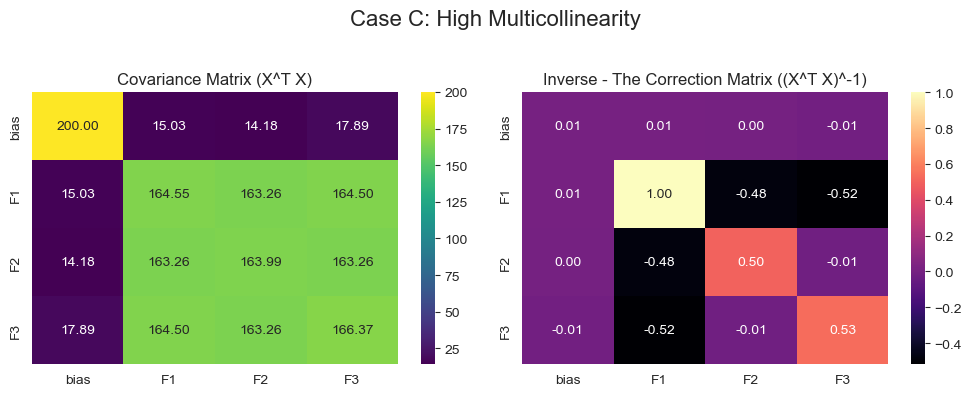

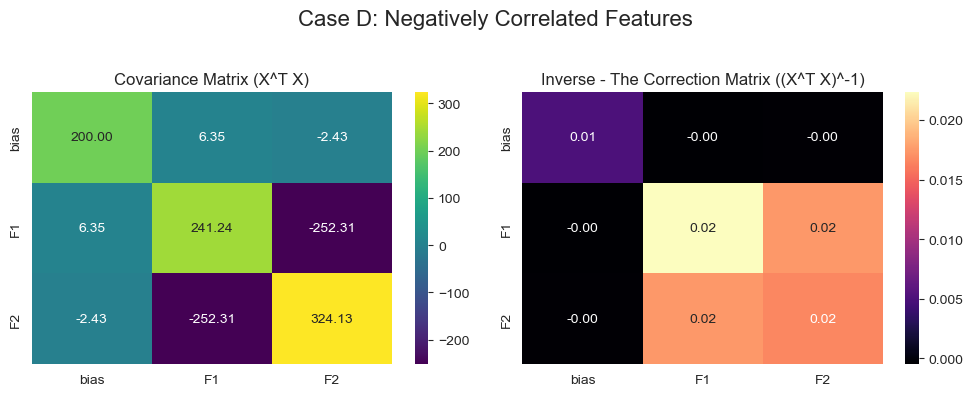

In [29]:
# Function to plot XTX and its inverse
def plot_covariance_and_inverse(X_matrix, labels, title):
    XTX = X_matrix.T @ X_matrix
    XTX_inv = np.linalg.inv(XTX)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(title, fontsize=16)
    
    sns.heatmap(XTX, annot=True, fmt='.2f', cmap='viridis', ax=ax1, xticklabels=labels, yticklabels=labels)
    ax1.set_title('Covariance Matrix (X^T X)')
    
    sns.heatmap(XTX_inv, annot=True, fmt='.2f', cmap='magma', ax=ax2, xticklabels=labels, yticklabels=labels)
    ax2.set_title('Inverse - The Correction Matrix ((X^T X)^-1)')
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# --- Generate Data for Scenarios ---
np.random.seed(1)
n_samples = 200
# Case A: Uncorrelated features
f1_uncorr = np.random.randn(n_samples)
f2_uncorr = np.random.randn(n_samples)
X_uncorr = np.c_[np.ones(n_samples), f1_uncorr, f2_uncorr]

# Case B: Positively correlated features (House example)
f1_pos = np.random.randn(n_samples)
f2_pos = f1_pos + np.random.normal(0, 0.5, n_samples)
X_pos = np.c_[np.ones(n_samples), f1_pos, f2_pos]

# Case C: All features highly positively correlated (multicollinearity)
f1_multi = np.random.randn(n_samples)
f2_multi = f1_multi + np.random.normal(0, 0.1, n_samples)
f3_multi = f1_multi + np.random.normal(0, 0.1, n_samples)
X_multi = np.c_[np.ones(n_samples), f1_multi, f2_multi, f3_multi]

# Case D: Two features are negatively correlated
f1_neg = np.random.randn(n_samples)
f2_neg = -f1_neg + np.random.normal(0, 0.5, n_samples)
X_neg = np.c_[np.ones(n_samples), f1_neg, f2_neg]

# --- Plotting All Scenarios ---
plot_covariance_and_inverse(X_uncorr, ['bias', 'F1', 'F2'], "Case A: Uncorrelated Features")
plot_covariance_and_inverse(X_pos, ['bias', 'F1', 'F2'], "Case B: Positively Correlated Features")
plot_covariance_and_inverse(X_multi, ['bias', 'F1', 'F2', 'F3'], "Case C: High Multicollinearity")
plot_covariance_and_inverse(X_neg, ['bias', 'F1', 'F2'], "Case D: Negatively Correlated Features")

<Figure size 1400x800 with 0 Axes>

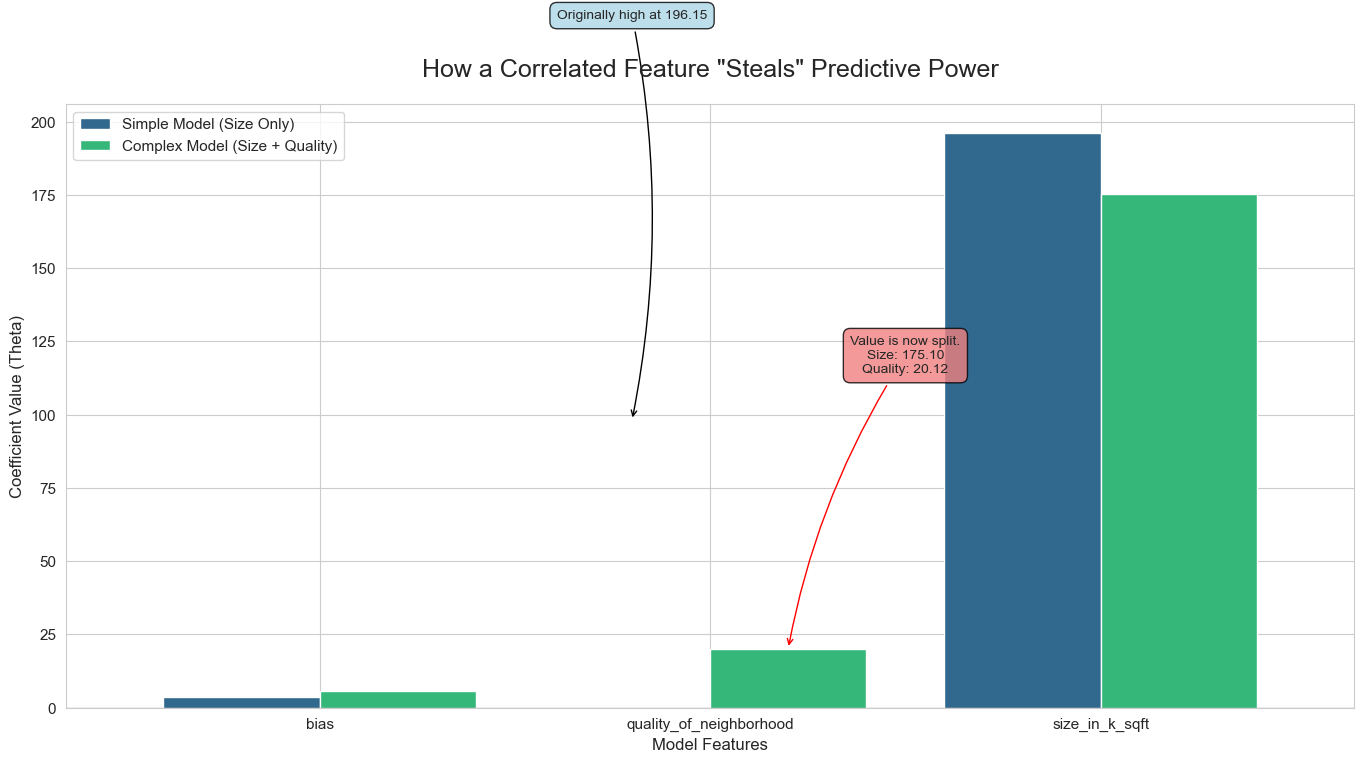

--- Final Coefficients (Simple Model) ---
[  3.70309846 196.14924484]

--- Final Coefficients (Complex Model) ---
[  5.64281531 175.09507736  20.11768488]


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Generation (Using User-Provided Code) ---
np.random.seed(0)
# Create 200 data points
n_samples = 200

# Feature 1: House Size in thousands of square feet
size_in_k_sqft = np.random.normal(1.5, 0.3, n_samples)

# Feature 2: Neighborhood Quality (correlated with size)
quality_of_neighborhood = size_in_k_sqft + np.random.normal(0, 0.2, n_samples)

# True Target: Price in Grands (thousands of dollars)
# Only depends on size
y_grands = 200 * size_in_k_sqft + np.random.normal(0, 20, n_samples)


# --- 2. Simple Model Calculation (Only 'size_in_k_sqft') ---

# Create our feature matrix 'X' with a bias term (column of ones) and the size feature.
# The bias term represents the y-intercept of the regression line.
X_simple = np.c_[np.ones(n_samples), size_in_k_sqft]

# Calculate the model coefficients (theta) using the Normal Equation: theta = (X^T * X)^-1 * X^T * y
# This is a direct analytical solution for linear regression.
XTX_inv_simple = np.linalg.inv(X_simple.T @ X_simple)
theta_simple = XTX_inv_simple @ (X_simple.T @ y_grands)


# --- 3. Complex Model Calculation (Adding the correlated feature) ---

# Create the full feature matrix with the bias, size, and the new correlated feature.
X_full = np.c_[np.ones(n_samples), size_in_k_sqft, quality_of_neighborhood]

# Calculate the new model coefficients using the same Normal Equation method.
XTX_inv_full = np.linalg.inv(X_full.T @ X_full)
theta_full = XTX_inv_full @ (X_full.T @ y_grands)


# --- 4. Creative Visualization ---

# Combine the results into a single DataFrame for easy side-by-side comparison.
# We create a dictionary where keys are the model names and values are pandas Series
# containing the coefficients. Using .fillna(0) handles the fact that the simple
# model doesn't have a coefficient for 'quality_of_neighborhood'.
comparison_df = pd.DataFrame({
    'Simple Model (Size Only)': pd.Series(theta_simple, index=['bias', 'size_in_k_sqft']),
    'Complex Model (Size + Quality)': pd.Series(theta_full, index=['bias', 'size_in_k_sqft', 'quality_of_neighborhood'])
}).fillna(0)

# Set a visually appealing style for the plot
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Plot the data as a bar chart.
ax = comparison_df.plot(kind='bar', figsize=(14, 8), rot=0, width=0.8,
                        color=sns.color_palette("viridis", 2))

# --- 5. Annotate the Chart to Tell the Story ---

# Set titles and labels for clarity
plt.title('How a Correlated Feature "Steals" Predictive Power', fontsize=18, pad=20)
plt.ylabel('Coefficient Value (Theta)', fontsize=12)
plt.xlabel('Model Features', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.axhline(0, color='black', linewidth=0.8) # Add a line at y=0

# Get coefficient values for easier annotation
size_coef_simple = comparison_df.loc['size_in_k_sqft', 'Simple Model (Size Only)']
size_coef_complex = comparison_df.loc['size_in_k_sqft', 'Complex Model (Size + Quality)']
quality_coef_complex = comparison_df.loc['quality_of_neighborhood', 'Complex Model (Size + Quality)']

# Annotation 1: Highlight the drop in the 'size_in_k_sqft' coefficient
plt.annotate(
    f'Originally high at {size_coef_simple:.2f}',
    xy=(0.8, size_coef_simple / 2),
    xytext=(0.8, size_coef_simple + 40),
    ha='center', va='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-0.1", color='black'),
    bbox=dict(boxstyle="round,pad=0.5", fc="lightblue", ec="k", lw=1, alpha=0.8)
)

# Annotation 2: Show where the "stolen" value went
stolen_amount = size_coef_simple - size_coef_complex
plt.annotate(
    f'Value is now split.\nSize: {size_coef_complex:.2f}\nQuality: {quality_coef_complex:.2f}',
    xy=(1.2, quality_coef_complex),
    xytext=(1.5, quality_coef_complex + 100),
    ha='center', va='center',
    bbox=dict(boxstyle="round,pad=0.5", fc="lightcoral", ec="k", lw=1, alpha=0.8),
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.1", color='red')
)

# Adjust layout to prevent labels from overlapping
plt.tight_layout(pad=2.0)
plt.legend(fontsize=11)

# Display the final plot
plt.show()

# Optional: Print the coefficients to the console
print("--- Final Coefficients (Simple Model) ---")
print(theta_simple)
print("\n--- Final Coefficients (Complex Model) ---")
print(theta_full)